In [1]:
from google.colab import files

uploaded = files.upload()

Saving car data.csv to car data.csv


In [3]:
import pandas as pd

df = pd.read_csv('car data.csv')
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB
None


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

In [7]:
# Drop the Car_Name column as it's unlikely to be a useful predictor
df.drop(columns=['Car_Name'], inplace=True)

In [8]:
# Separate features and target variable
X = df.drop(columns=['Selling_Price'])
y = df['Selling_Price']

In [9]:
# Preprocess the data
# Define categorical and numerical columns
categorical_cols = ['Fuel_Type', 'Selling_type', 'Transmission']
numerical_cols = ['Year', 'Present_Price', 'Driven_kms', 'Owner']

In [12]:
# Preprocessing for numerical data
numerical_transformer = StandardScaler()

# Preprocessing for categorical data
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

In [13]:
# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [14]:
# Define the model
model = LinearRegression()

In [15]:
# Create and evaluate the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)
                          ])


In [16]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Fit the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

In [18]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')

Mean Squared Error: 3.4813498305118533
Mean Absolute Error: 1.216374019333042


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

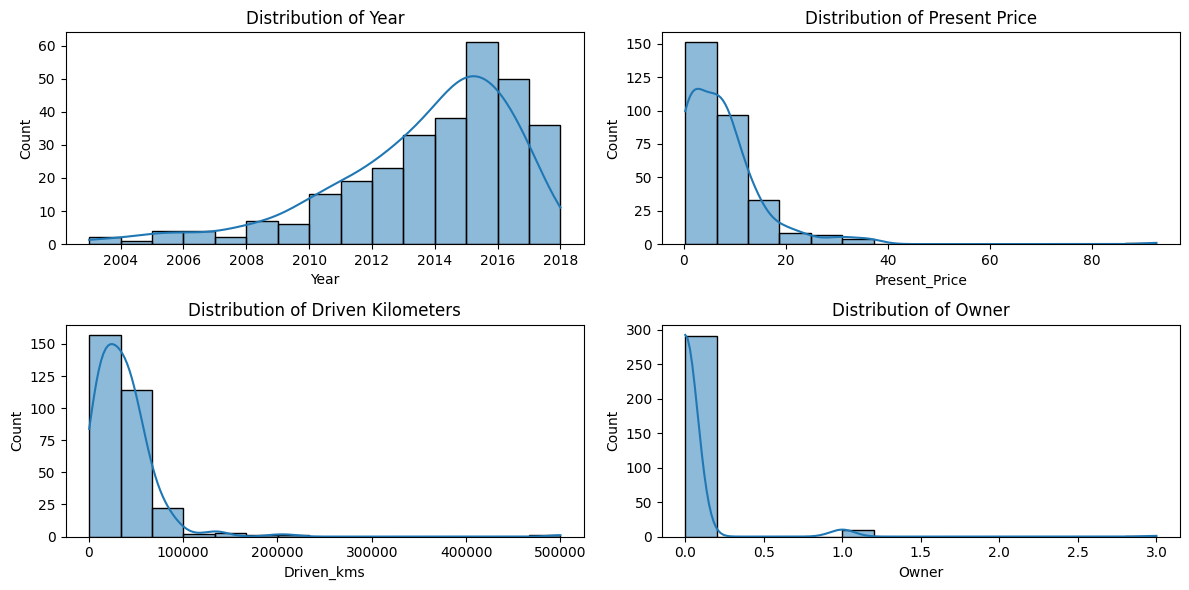

In [20]:
# Plotting the distributions of numerical features
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
sns.histplot(df['Year'], kde=True, bins=15)
plt.title('Distribution of Year')

plt.subplot(2, 2, 2)
sns.histplot(df['Present_Price'], kde=True, bins=15)
plt.title('Distribution of Present Price')

plt.subplot(2, 2, 3)
sns.histplot(df['Driven_kms'], kde=True, bins=15)
plt.title('Distribution of Driven Kilometers')

plt.subplot(2, 2, 4)
sns.histplot(df['Owner'], kde=True, bins=15)
plt.title('Distribution of Owner')

plt.tight_layout()
plt.show()

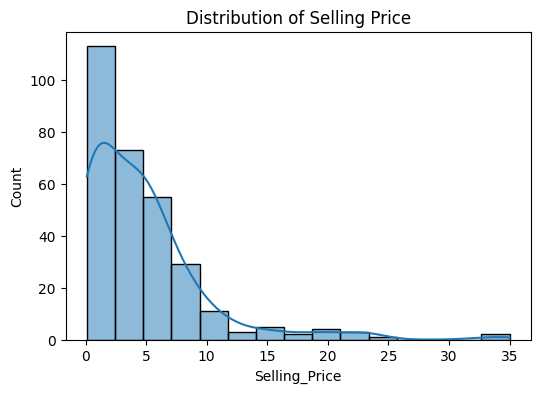

In [21]:
# Plotting the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.histplot(df['Selling_Price'], kde=True, bins=15)
plt.title('Distribution of Selling Price')
plt.show()

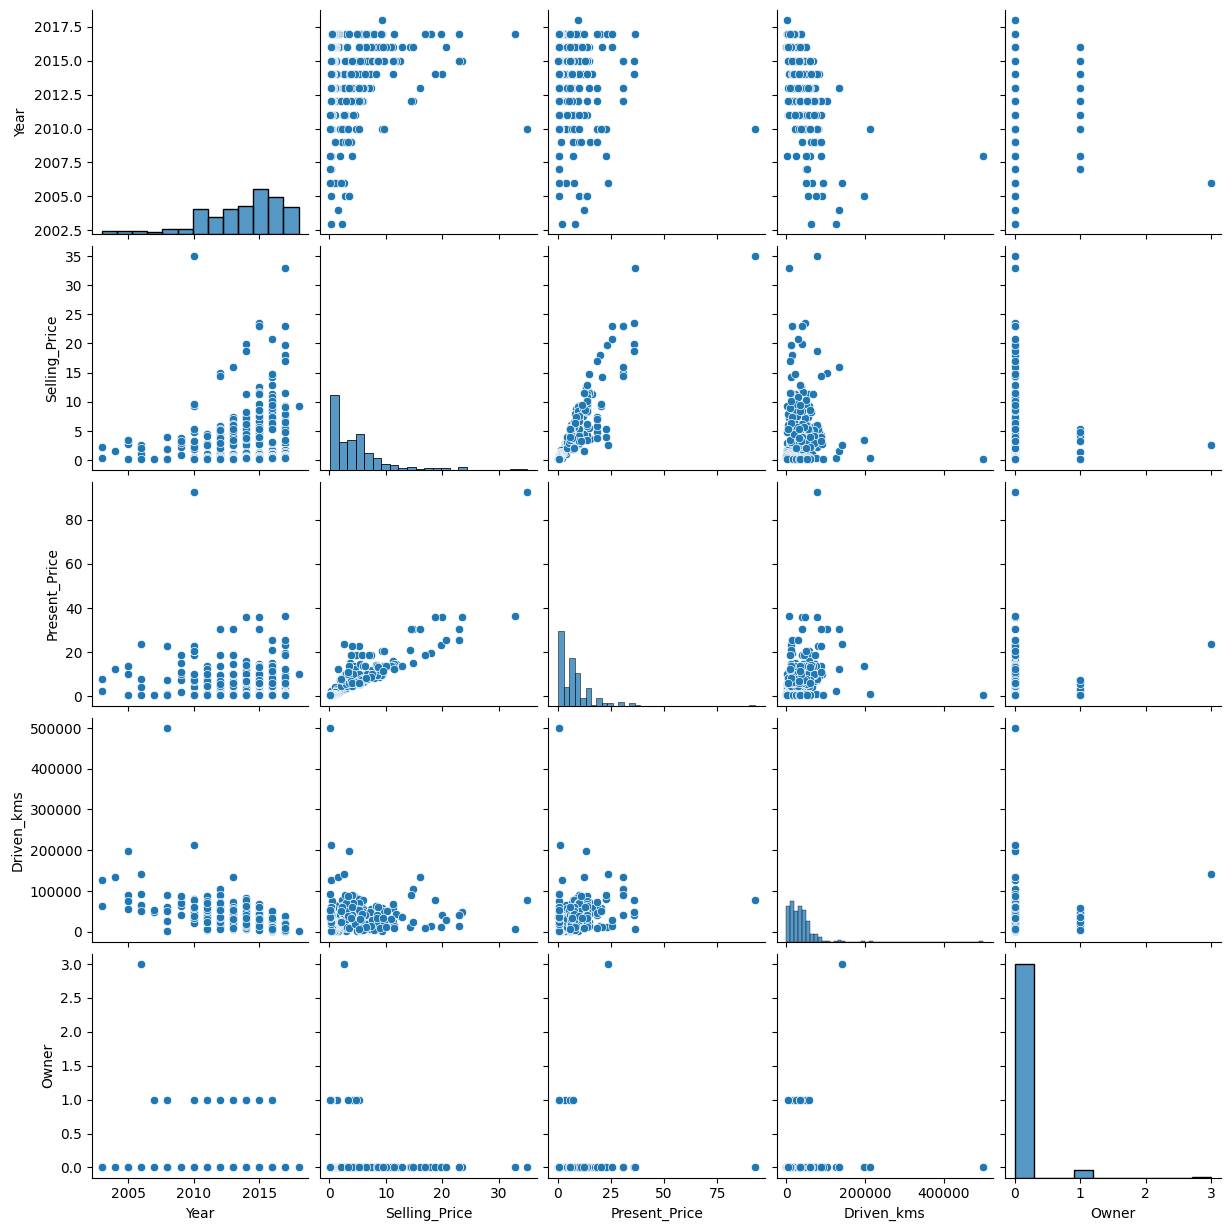

In [22]:
# Pairplot to see relationships between variables
sns.pairplot(df)
plt.show()

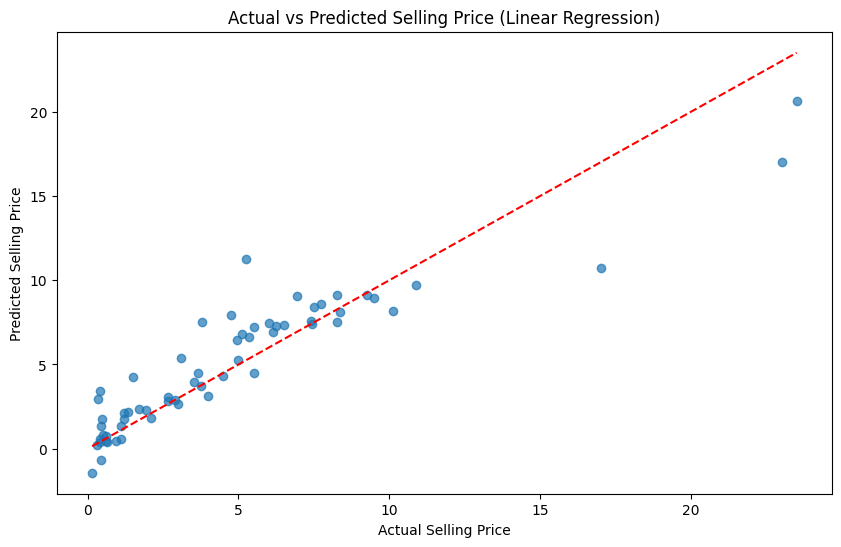

In [29]:
# Plot actual vs. predicted values for Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.title('Actual vs Predicted Selling Price (Linear Regression)')
plt.show()

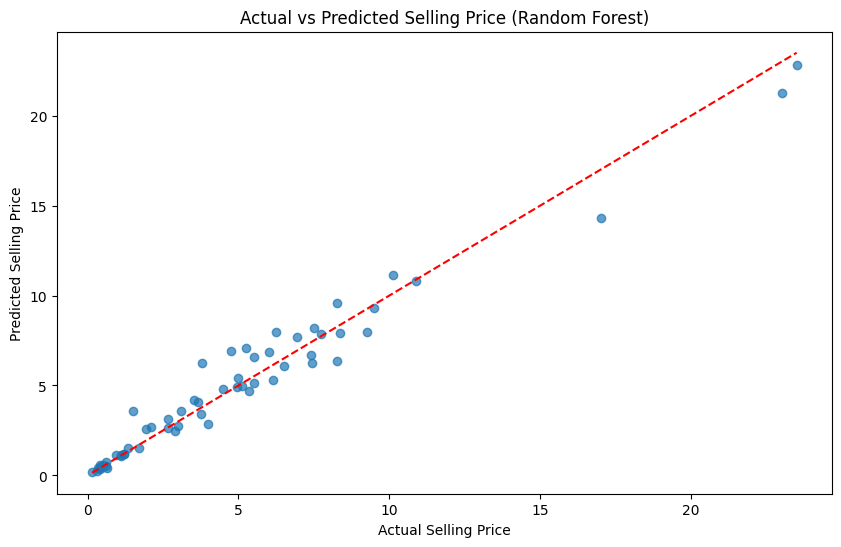

In [32]:
# Create and evaluate the pipeline with Random Forest
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', RandomForestRegressor(n_estimators=100, random_state=42))
                             ])

rf_pipeline.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_pipeline.predict(X_test)

# Plot actual vs. predicted values for Random Forest
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.title('Actual vs Predicted Selling Price (Random Forest)')
plt.show()